<a href="https://colab.research.google.com/github/naufalnashif/sentiment-analysis-biskita/blob/main/scraping_tweets_using_snscrape_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git

In [ ]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
from tqdm.notebook import tqdm

pd.describe_option('max_colwidth')

## Get tweets using keyword 'biskita' and 'transpakuan' 
-  Since 01 Jan 2023 until 11 Jun 2023

In [ ]:

scrapper = sntwitter.TwitterSearchScraper("biskita until:2023-06-11 since:2023-01-1")

tweets = []
n_tweets = 4_000
for i,tweet in tqdm(enumerate(scrapper.get_items()), total=n_tweets):
  data = [
    tweet.date,
    tweet.id,
    tweet.rawContent,
    tweet.user.username,
    tweet.likeCount,
    tweet.retweetCount,
  ]
  tweets.append(data)
  if i > n_tweets : 
    break

df_bis_2023 = pd.DataFrame(
    tweets, columns=["date", "id", "content", "username", "like_count", "retweet_count" ]
)
df_bis_2023.to_csv('Biskita_2023.csv')

In [ ]:
scrapper = sntwitter.TwitterSearchScraper("trans pakuan until:2023-06-11 since:2023-01-1")

tweets = []
n_tweets = 4_000
for i,tweet in tqdm(enumerate(scrapper.get_items()), total=n_tweets):
  data = [
    tweet.date,
    tweet.id,
    tweet.rawContent,
    tweet.user.username,
    tweet.likeCount,
    tweet.retweetCount,
  ]
  tweets.append(data)
  if i > n_tweets : 
    break

df_trans_2023 = pd.DataFrame(
    tweets, columns=["date", "id", "content", "username", "like_count", "retweet_count" ]
)
df_trans_2023.to_csv('Transpakuan_2023.csv')

## Append the data

In [5]:
df = df_bis_2023.append(df_trans_2023)

<ipython-input-5-dc12600eff31>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_bis_2023.append(df_trans_2023)


In [6]:
print(df.shape)
print(df_bis_2023.shape)
print(df_trans_2023.shape)

(2140, 6)
(1719, 6)
(421, 6)


In [7]:
pd.set_option('display.max_colwidth', None)

In [8]:
df.head()

,date,id,content,username,like_count,retweet_count
0,2023-06-10 11:48:01+00:00,1667498850146488320,gue orang bogor tapi bingung sama rute biskita bogor,wujijuyu,0,0
1,2023-06-10 10:23:02+00:00,1667477465097469952,biskita koridor 1 klo sore jrg bgtt😮‍💨😮‍💨,njaemmmn,0,0
2,2023-06-10 01:30:43+00:00,1667343503909855232,ustad liat ustad ada yg males mandi padahal harus ke kantor jam 10 berarti gw harus naik biskita jam set 10an paling telat krn ke kota berarti gw harus siap siap jam 9 dan HARUS MANDI SEKARANG tapi malesszzz dingin,atmylowestlow,0,0
3,2023-06-09 05:34:14+00:00,1667042396390191106,@obese_doc Biskita apa eh maksud dia? 😂,EastMister0822,0,0
4,2023-06-09 05:32:39+00:00,1667041998963097600,@EastMister0822 Biskita urang kitani jua\n\n(Not a Bruneian),obese_doc,2,0


<Axes: title={'center': 'Counts of Tweet'}>

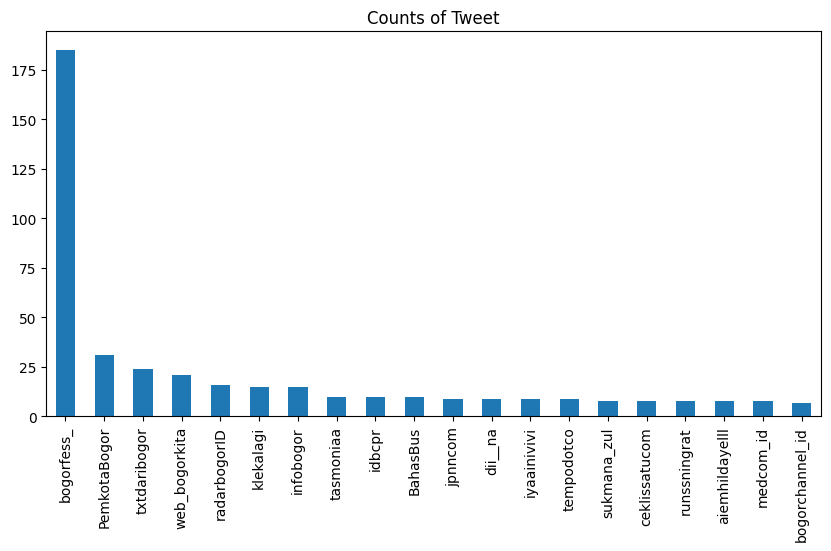

In [9]:
df['username'].value_counts().head(20).plot(kind = 'bar', title = 'Counts of Tweet', figsize = (10,5))

## Remove Duplicate Tweets based on 'Content'

In [10]:
df_drop = df.drop_duplicates(subset = ['content'])

In [11]:
print('Sebelum drop duplicates : {} tweets'.format(len(df)))
print('Sesudah drop duplicates : {} tweets'.format(len(df_drop)))
print('Total tweet terhapus : {} tweets'.format(len(df) - len(df_drop)))

Sebelum drop duplicates : 2140 tweets
Sesudah drop duplicates : 2023 tweets
Total tweet terhapus : 117 tweets


## Get the xlsx file

In [12]:
# Convert datetime column to timezone-unaware
df_drop['date'] = df_drop['date'].dt.tz_localize(None)

df_drop.to_excel("bis_trans-2023.xlsx", index=False)

<ipython-input-12-27e826973ee7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['date'] = df_drop['date'].dt.tz_localize(None)
